In [1]:
from matplotlib import pyplot as plt
import numpy as np
import time
from IPython.display import clear_output


Bad key "xtick.alignment" on line 250 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "ytick.alignment" on line 268 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import tensorflow as tf

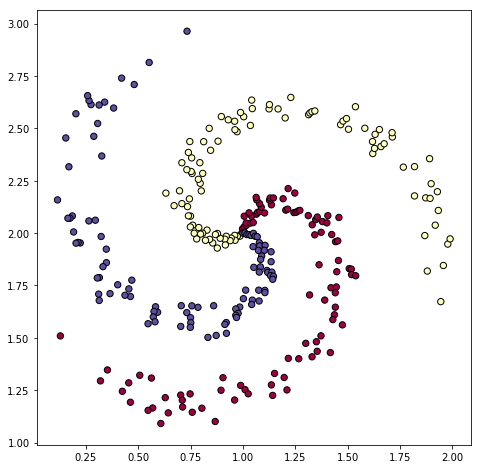

In [3]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
X[:, 0] += 1
X[:, 1] += 2
# lets visualize the data:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors="black")
ax = plt.gca()
ax.set_aspect("equal")
plt.show()

In [4]:
def plot(h=0.02):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                 np.arange(y_min, y_max, h))
    Z = sess.run(t_prediction, feed_dict={t_x: np.column_stack([xx.ravel(), yy.ravel()])})
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10,8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.gca().set_aspect("equal")
    plt.show()

### Linear SoftMax Classifier

In [5]:
t_x = tf.placeholder(tf.float32, shape=[None, D])
t_y = tf.placeholder(tf.int32, shape=[None])
W = tf.Variable(tf.random_normal([D, K]))
b = tf.Variable(tf.zeros([1, K], dtype=tf.float32))

In [6]:
# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

t_scores = tf.matmul(t_x, W) + b
t_prediction = tf.argmax(t_scores, axis=-1, output_type=tf.int32)
t_acc = tf.reduce_mean(tf.cast(tf.equal(t_prediction, t_y), tf.float32))
t_loss_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=t_y, logits=t_scores)
t_loss_reg = tf.reduce_sum(W * W) * reg
t_loss = tf.reduce_mean(t_loss_entropy + t_loss_reg)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=step_size)

train_op = optimizer.minimize(t_loss)

In [7]:
if "sess" in dir():
    sess.close()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

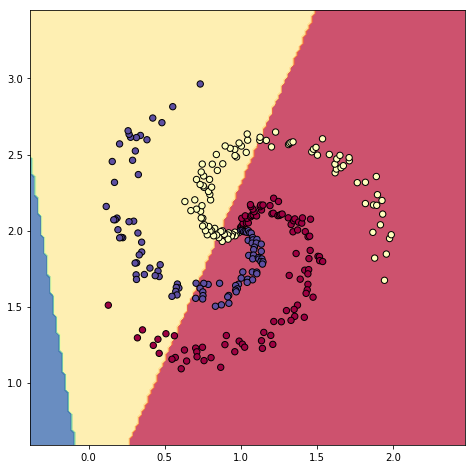

In [8]:
# plot the resulting classifier
plot()

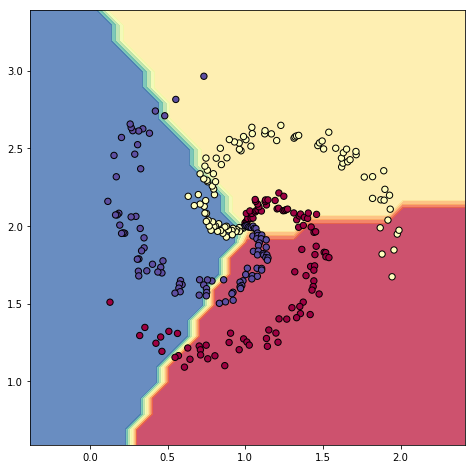

In [10]:
for i in range(200):
    loss, acc, _ = sess.run([t_loss, t_acc, train_op], feed_dict={t_x:X, t_y:y})
#     time.sleep(0.1)
    
    if i % 2 == 0:
        print("iteration %d:\tloss %f\tacc %f" % (i, loss, acc))
        clear_output(wait=True)
        plot(h=0.1)

In [11]:
# evaluate training set accuracy
print('training accuracy: %.2f%%' % (100*sess.run(t_acc, feed_dict={t_x:X, t_y:y})))

training accuracy: 54.00%
